<a href="https://colab.research.google.com/github/taukirazam16/PyTorch-Practice/blob/main/Digit_Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary
MNIST<br>
Data Loader, Transformation <br>
Multilayer NN, Activation Function <br>
Loss and Optimizer <br>
Training Loop (Batch Training)<br>
Model Evaluation <br>



In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [105]:
#hyper parameter
input_size = 784 #because input image = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 50
batch_size = 100
learning_rate = 0.001

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [16]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
train_loader

In [13]:
print(len(train_loader))

600


In [14]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size)
print(len(test_loader))

100


In [17]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


tensor(7) tensor(1) tensor(8) tensor(3) tensor(1) tensor(3) 

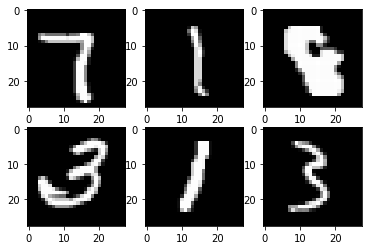

In [28]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')
  print(labels[i],end=' ')

plt.show()


# Neural Net

In [34]:
class NeuralNet(nn.Module):
  def __init__(self, input_size,hidden_size,num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out



In [35]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [36]:
#Loss and Optimizer

criterion = nn.CrossEntropyLoss()
Optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [39]:
n_total_steps = len(train_loader)
n_total_steps

600

In [106]:
#training loop
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    Optimizer.zero_grad()
    loss.backward()
    Optimizer.step()

    if (i+1) % 100 ==0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/50], Step [100/600], Loss: 0.0899
Epoch [1/50], Step [200/600], Loss: 0.0904
Epoch [1/50], Step [300/600], Loss: 0.1047
Epoch [1/50], Step [400/600], Loss: 0.1056
Epoch [1/50], Step [500/600], Loss: 0.1399
Epoch [1/50], Step [600/600], Loss: 0.0439
Epoch [2/50], Step [100/600], Loss: 0.1490
Epoch [2/50], Step [200/600], Loss: 0.1113
Epoch [2/50], Step [300/600], Loss: 0.1620
Epoch [2/50], Step [400/600], Loss: 0.1108
Epoch [2/50], Step [500/600], Loss: 0.0630
Epoch [2/50], Step [600/600], Loss: 0.0790
Epoch [3/50], Step [100/600], Loss: 0.1225
Epoch [3/50], Step [200/600], Loss: 0.0972
Epoch [3/50], Step [300/600], Loss: 0.0354
Epoch [3/50], Step [400/600], Loss: 0.0614
Epoch [3/50], Step [500/600], Loss: 0.0439
Epoch [3/50], Step [600/600], Loss: 0.1331
Epoch [4/50], Step [100/600], Loss: 0.0837
Epoch [4/50], Step [200/600], Loss: 0.0961
Epoch [4/50], Step [300/600], Loss: 0.0910
Epoch [4/50], Step [400/600], Loss: 0.0651
Epoch [4/50], Step [500/600], Loss: 0.0817
Epoch [4/50

In [107]:
#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    #value, index
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100 * n_correct / n_samples
  print("Accuracy: ", acc)


Accuracy:  97.7


#Testing Manually

In [93]:
import torchvision.transforms as T

from PIL import Image

In [167]:
def image_processing(photo):
  
  img = Image.open(photo)
  
  making_single_channel = T.Compose([T.Grayscale(),T.Scale((28,28)),T.ToTensor()])
  p = T.Compose([T.Scale((28,28)),T.ToTensor()])
  x = p(img)
  
  if x.shape[0] != 1:
    x = making_single_channel(img)
    
  x = x.reshape(-1,28*28).to(device)
  
  return x



In [181]:
#prediction
def prediction(x):
  
  pred = model(x)
  
  _,predict = torch.max(pred,1)
  
  return predict[0].item()

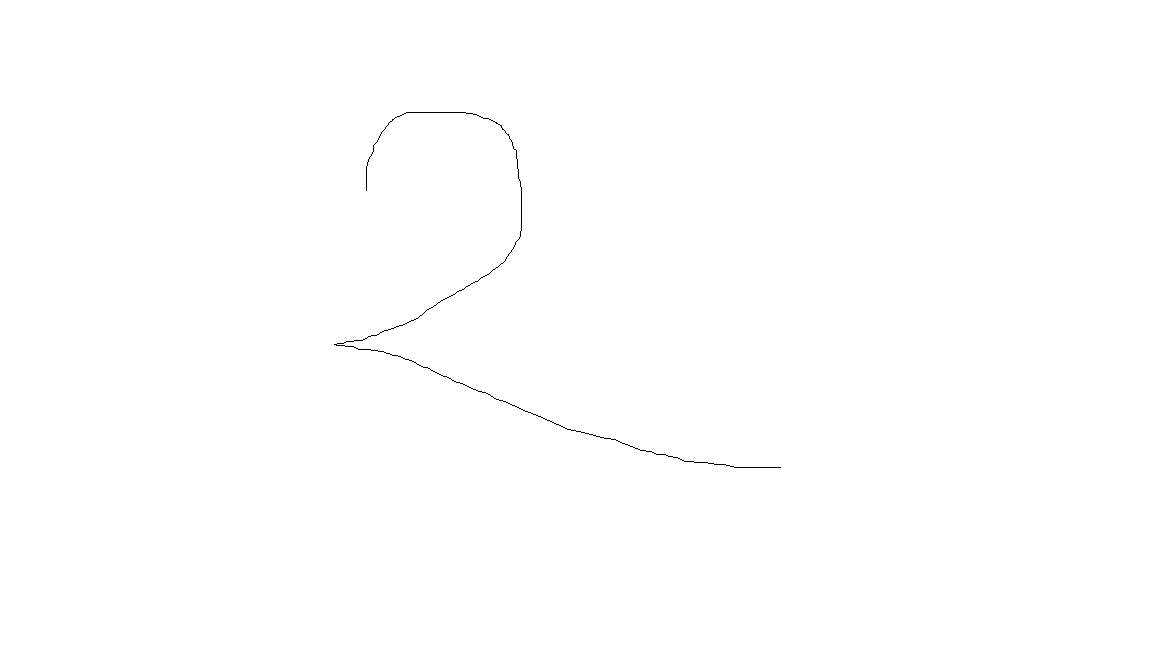

In [175]:
img = Image.open("two.png")
img

In [177]:
#TEST Run
img = image_processing("two.png")
output = prediction(img)
print(f"The predicted value is: {output}")

The predicted value is: 2


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
